# <font color=black>DATA 557 Homework 4</font>
***
### <font color=black>Question 
The data consist of sales prices for a sample of homes from a US city and some features of the houses. <br>
Variables:<br>
            LAST_SALE_PRICE &emsp; : &emsp;the sale price of the home <br>
            SQFT     &emsp;   : &emsp;area of the house (sq. ft.)<br>
            LOT_SIZE  &emsp;    : &emsp;area of the lot (sq. ft.)<br>
            BEDS       &emsp;  : &emsp;number of bedrooms<br>
            BATHS       &emsp;  : &emsp;number of bathrooms<br>
</font>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats import anova
from scipy import stats

In [3]:
df_sales = pd.read_csv("data/Sales.csv")

__1. Calculate all pairwise correlations between all five variables.__ 

In [4]:
df_sales.corr(method='pearson', min_periods=1)

,LAST_SALE_PRICE,SQFT,LOT_SIZE,BEDS,BATHS
LAST_SALE_PRICE,1.000000,0.724113,0.133390,0.372184,0.580820
SQFT,0.724113,1.000000,0.221454,0.635394,0.752309
LOT_SIZE,0.133390,0.221454,1.000000,0.165247,0.137365
BEDS,0.372184,0.635394,0.165247,1.000000,0.609627
BATHS,0.580820,0.752309,0.137365,0.609627,1.000000


In [5]:
def corr(df_sales,pair):
    denomX = 0
    denomY = 0
    num = 0
    df = df_sales[df_sales[pair[0]].notna() & df_sales[pair[1]].notna()]
    for i in range(len(df)):
            num = num + ((df.iloc[i][pair[0]]-df[pair[0]].mean())*(df.iloc[i][pair[1]]-df[pair[1]].mean()))
            denomX = denomX + ((df.iloc[i][pair[0]]-df[pair[0]].mean())**2)
            denomY = denomY + ((df.iloc[i][pair[1]]-df[pair[1]].mean())**2)
    r = num/((denomX*denomY)**0.5)
    print("%s , %s : %f" %(pair[0],pair[1],r))

                                             
for i in range(len(list(df_sales.columns))):
    for j in range(i+1,5):
        corr(df_sales,[df_sales.columns[i],df_sales.columns[j]])



LAST_SALE_PRICE , SQFT : 0.724113
LAST_SALE_PRICE , LOT_SIZE : 0.133390
LAST_SALE_PRICE , BEDS : 0.372184
LAST_SALE_PRICE , BATHS : 0.580820
SQFT , LOT_SIZE : 0.221454
SQFT , BEDS : 0.635394
SQFT , BATHS : 0.752309
LOT_SIZE , BEDS : 0.165247
LOT_SIZE , BATHS : 0.137365
BEDS , BATHS : 0.609627


For the rest of the HW, I removed the null values from 3 columns : SQFT, LAST_SALE_PRICE and LOT_SIZE as these are the only columns we work with.

In [6]:
df = df_sales[df_sales['LAST_SALE_PRICE'].notna() & df_sales['SQFT'].notna() & df_sales['LOT_SIZE'].notna()]

__2.  Make a  scatterplot of the sale price versus the area of the house. Describe the association 
between these two variables.__

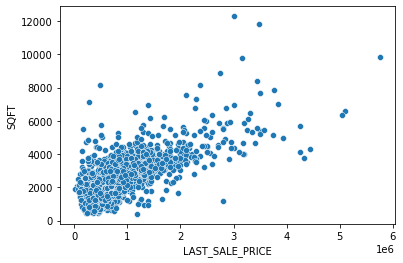

In [7]:
splot = sns.scatterplot(data = df_sales, x = "LAST_SALE_PRICE", y = "SQFT")

[None]

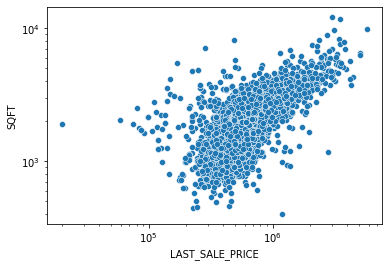

In [8]:
splot = sns.scatterplot(data = df_sales, x = "LAST_SALE_PRICE", y = "SQFT")
splot.set(yscale = 'log')
splot.set(xscale = 'log')

From the above graphs, we can see that SQFT and LAST_SALE_PRICE have an __approximately linear relationship__. Though there are outliers, as SQFT increases, so does LAST_SALE_PRICE.

__3. Fit a simple linear regression model (Model 1) with sale price as response variable and area of 
the house (SQFT) as predictor variable. State the estimated value of the intercept and the 
estimated coefficient for the area variable.__

In [9]:
model1 = ols('LAST_SALE_PRICE ~ SQFT', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        LAST_SALE_PRICE   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     4969.
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:24:10   Log-Likelihood:                -57353.
No. Observations:                4078   AIC:                         1.147e+05
Df Residuals:                    4076   BIC:                         1.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.96e+04   1.22e+04     -4.054      0.0

In [10]:
print('\033[1m'+"Intercept : %f\nCoeffcient of SQFT : %f" %(model1.params[0],model1.params[1]))

Intercept : -49597.088022
Coeffcient of SQFT : 351.758100


__4. Write the equation that describes the relationship between the mean sale price and SQFT.__

Linear regression is based on the following underlying statistical model : <br>
Y = α + βx <br>
where, <br>
α is the intercept <br>
β is the regression coefficient for X <br>
Here our dependent variable Y is Sale Price and the independent variable X is SQFT. So, <br>
Sale Price = intercept + coeff * Area <br>
<center>LAST_SALE_PRICE = -49597.088 + 351.758 * SQFT

__5. State the interpretation in words of the estimated intercept.__

The interpretation of α is the mean of Y given X = 0, i.e., <br>
E(Y |X = 0) = α + β ×0 = α. This is the point where the regression line crosses the y-axis. <br>

__α = -49597.088 is the estimated mean sale price if area is set to 0.__

__6. State the interpretation in words of the estimated coefficient for the area variable.__

__The interpretation of the coeffcient is the average difference in the mean of Sale price per unit
difference in Area of the house.__<br>
β is the slope of the regression line.

__7. Add the LOT_SIZE variable to the linear regression model (Model 2). How did the estimated 
coefficient for the SQFT variable change?__

In [11]:
model2 = ols('LAST_SALE_PRICE ~ SQFT + LOT_SIZE', data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        LAST_SALE_PRICE   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     2502.
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:24:10   Log-Likelihood:                -57345.
No. Observations:                4078   AIC:                         1.147e+05
Df Residuals:                    4075   BIC:                         1.147e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.439e+04   1.28e+04     -2.689      0.0

The magnitude of estimated coeffcient for SQFT is slightly larger. 351.758 to 356.6154 <br>
This hints that there is no strong relationship between SQFT and LOT_SIZE

__8. State the interpretation of the coefficient of SQFT in Model 2.__

__In the second model the coefficient of ‘SQFT’ is interpreted as the average difference in sale price for a unit change in area of a specific lot size. <br>__

Because the estimated coeffcients did not change extremely for both the models, LOT_SIZE does not have a confounding effect on the model. This is also corroborated by the correlation coeffcient from Q1, which was a relatively low value of 0.221 for LOT_SIZE and SQFT.

__9. Report the R-squared values from the two models. Explain why they are different.__

In [12]:
print('\033[1m'+"Model 1 R squared Value : %f\nModel 2 R squared Value : %f" %(model1.rsquared,model2.rsquared))

Model 1 R squared Value : 0.549386
Model 2 R squared Value : 0.551159


For a Simple Linear Regression model, R squared value is the square of the correlation coeffcient and it describes how much variation in sale price is explained by the model.<br>
For the second model, with 2 predictor variables, R squared value is the correlation between the observed values and the fitted values also including the percentage of variance explained by the model.<br>
So the variation in sale price is described by both SQFT and LOT_SIZE.

__10. Report the estimates of the error variances from the two models. Explain why they are 
different.__

In [13]:
print('\033[1m'+"Model 1 Error Variance : %f\nModel 2 Error Variance : %f" %(np.sum(model1.resid**2)/model1.df_resid,np.sum(model2.resid**2)/model2.df_resid))

Model 1 Error Variance : 96282502456.679489
Model 2 Error Variance : 95927158154.606934


Error Variance describes the variation in the measurments of both response and predictor variables. <br>
The Error Variance in Model 2 is less than Model 1, which makes sense and including a second predictor variable better explained the response.

__11. State the interpretation of the estimated error variance for Model 2.__

The error variance is estimated using the sum of squares of residuals -<br>
error variance = sum of squares of residuals / n-p ,<br> where n is sample size and p is number of predictor variables.<br><br>
Error variance is the statistical variability of scores caused by the influence of variables other than the independent variables. <br>
So here it represents the variance we can expect in sale price without the influence of are and lot size

__12. Test the null hypothesis that the coefficient of the SQFT variable in Model 2 is equal to 0. 
(Assume that the assumptions required for the test are met.)__

The full model : <br>
<center> Y = β<sub>0</sub> + β<sub>1</sub> * SQFT + β<sub>2</sub> * LOT_SIZE </center>

We can define the null hypothesis as : <br>
<center> H0 : β<sub>1</sub> = 0  <br></center>

Hence, our reduced model is : <br>
<center> Y = β<sub>0</sub> + β<sub>2</sub> * LOT_SIZE </center>

In [19]:
red_model = ols('LAST_SALE_PRICE ~ LOT_SIZE', data=df).fit()
anovaResults = anova_lm(red_model, model2)
f_statistic = anovaResults.values[1][4]
print('\033[1m'+"F statistic : %f"%(f_statistic))
p = 1-stats.f.cdf(f_statistic, 1, 4062)
print("p value : "f'{p:.20f}')
print(red_model.summary())

F statistic : 4840.580788
p value : 0.00000000000000011102
                            OLS Regression Results                            
Dep. Variable:        LAST_SALE_PRICE   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     74.69
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           7.80e-18
Time:                        17:24:51   Log-Likelihood:                -58941.
No. Observations:                4078   AIC:                         1.179e+05
Df Residuals:                    4076   BIC:                         1.179e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

Because the p value is less than a significance level of 0.05, we __reject__ the null hypothesis that  β<sub>1</sub> = 0,<br>
So we do not have enough evidence to say that area does not significantly affect sale price.

__13. Test the null hypothesis that the coefficients of both the SQFT and LOT_SIZE variables are 
equal to 0. Report the test statistic.__

The full model : <br>
<center> Y = β<sub>0</sub> + β<sub>1</sub> * SQFT + β<sub>2</sub> * LOT_SIZE </center>

We can define the null hypothesis as : <br>
<center> H0 : β<sub>1</sub> = β<sub>2</sub> = 0  <br></center>

Hence, our reduced model is : <br>
<center> Y = β<sub>0</sub> </center>

In [62]:
red_model2 = ols('LAST_SALE_PRICE ~ 1', data=df).fit()
anovaResults = anova_lm(red_model2, model2)
f_statistic = anovaResults.values[1][4]
print('\033[1m'+"F statistic : %f"%(f_statistic))
p = 1-stats.f.cdf(f_statistic, 2, 4062)
print("p value : "f'{p:.20f}')

F statistic : 2501.973648
p value : 0.00000000000000011102


__14. What is the distribution of the test statistic under the null hypothesis (assuming model 
assumptions are met)?__

The distribution of the F-statistic can be described as : F<sub>p1−p0,n−p1</sub>  where n is sample size, p0 is the number of predictor variables for reduced model and p1 is the number of predictor variables for full model.<br> 
So, the test statistic follows the distribution of :<br>
<center>F<sub> 2 , 4062</sub></center>

__15. Report the p-value for the test in Q13.__

We got the p value as 0.00000000000000011102 which is extremely small so at a significance level of 0.05, we can __reject__ the null hypothesis that β<sub>1</sub> = β<sub>2</sub> = 0,<br>

So we can say that either SQFT or LOT_SIZE has statitstically significant affect on sale price.